# 고유분해와 특이값 분해
### numpy linalg 서브패키지에서 eig(고유값, 고유벡터 구하는 것)
### 고유값은 벡터의 형태로, 고유벡터는 고유벡터행렬의 형태로 묶여서 나오면 고유벡터는 크기가 1되도록 정규화 되어있음

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [11]:
w, V = np.linalg.eig(np.array([[1, -2], [2, -3]]))

In [12]:
w

array([-0.99999998, -1.00000002])

In [4]:
V

array([[ 0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

# 대칭 행렬의 고유 분해
### 행렬 A가 대칭(symmetric)행렬이면 고유벡터들이 서로 수직(othogonal)
### -> 고유벡터끼리의 내적=0

# 확률 변수의 좌표 변환
### 다변수 가우시안 정규분포

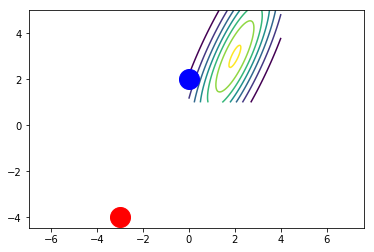

In [19]:
mu = [2, 3]
cov = [[2, 3], [3, 7]]
rv = multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))

x1 = np.array([0, 2])
x1_mu = x1 - mu
x2 = np.array([3, 4])
x2_mu =- x2 - mu
plt.plot(x1_mu[0] + mu[0], x1_mu[1] + mu[1], 'bo', ms=20)
plt.plot(x2_mu[0] + mu[0], x2_mu[1] + mu[1], 'ro', ms=20)

plt.axis("equal")
plt.show()

In [20]:
w, V = np.linalg.eig(cov)

In [21]:
w

array([ 0.59487516,  8.40512484])

In [22]:
V

array([[-0.90558942, -0.4241554 ],
       [ 0.4241554 , -0.90558942]])

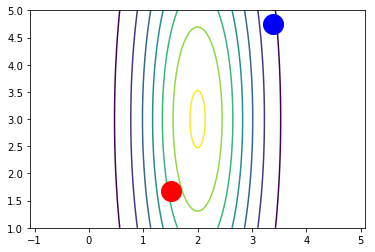

In [24]:
rv = multivariate_normal(mu, w)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))

x1 = np.array([0, 2])
x1_mu = x1 - mu
x2 = np.array([3, 4])
x2_mu = x2 - mu

x1t_mu = V.T.dot(x1_mu) # 좌표변환
x2t_mu = V.T.dot(x2_mu) # 좌표변환

plt.plot(x1t_mu[0] + mu[0], x1t_mu[1] + mu[1], 'bo', ms=20)
plt.plot(x2t_mu[0] + mu[0], x2t_mu[1] + mu[1], 'ro', ms=20)

plt.axis("equal")
plt.show()

# 특이값 분해(singular value decomposition)
### 정방 행렬이 아닌 행렬 M에 대해서도 고유 분해와 유사한 분해가 가능 하다. 이를 특이값 분해라 한다.

In [6]:
from pprint import pprint
M = np.array([[1, 0, 0, 0, 0], [0, 0, 2, 0, 3], [0, 0, 0, 0, 0], [0, 2, 0, 0, 0]])
print("\nM:"); pprint(M)
U, S0, V0 = np.linalg.svd(M, full_matrices=True)
print("\nU"); pprint(U)
S = np.hstack([np.diag(S0), np.zeros(M.shape[0])[:,np.newaxis]])
print("\nS:"); pprint(S)
V = V0.T
print("\nV:"); pprint(V)
print("\nU.dot(U.T):"); pprint(U.dot(U.T))
print("\nV.dot(V.T):"); pprint(V.dot(V.T))
print("\nU.dot(S).dot(V.T):"); pprint(U.dot(S).dot(V.T))


M:
array([[1, 0, 0, 0, 0],
       [0, 0, 2, 0, 3],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

U
array([[ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  1.,  0.,  0.]])

S:
array([[ 3.60555128,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

V:
array([[-0.        , -0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5547002 ,  0.        ,  0.        , -0.83205029,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.83205029,  0.        ,  0.        ,  0.5547002 ,  0.        ]])

U.dot(U.T):
array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
   